# Homework 14

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from matplotlib.colors import ListedColormap
import pysal


In [2]:
powerplants = pd.read_csv('powerplants.csv')

In [3]:
powerplants.head(4)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800


In [4]:
powerplants.dtypes

Plant_Code      int64
Plant_Name     object
Utility_Na     object
Utility_ID      int64
sector_nam     object
City           object
County         object
Zip             int64
Street_Add     object
PrimSource     object
Total_MW      float64
Coal_MW       float64
NG_MW         float64
Crude_MW      float64
Bio_MW        float64
Hydro_MW      float64
HydroPS_MW    float64
Nuclear_MW    float64
Solar_MW      float64
Wind_MW       float64
Geo_MW        float64
Other_MW      float64
source_des     object
tech_desc      object
Source         object
Period          int64
Latitude      float64
Longitude     float64
dtype: object

In [5]:
us_states = gpd.read_file('/Users/catherine/Desktop/lede/13-homework/cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
us_states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."


In [6]:
#us_states = us_states[(us_states.STUSPS != 'AK') & (us_states.STUSPS != 'HI') & (us_states.STUSPS != 'VI') & (us_states.STUSPS != 'AS') & (us_states.STUSPS != 'PR') & (us_states.STUSPS != 'GU') & (us_states.STUSPS != 'MP')] 

In [7]:
pd.set_option('display.max_columns', 1000)

In [8]:
points = powerplants.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)


In [9]:
from shapely.geometry import Polygon
us_states.to_crs({'init': 'epsg:4326'}).intersects(powerplants).head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

### 1. Make a map of power plants in the US, color coded by type


(-21940545.97915272,
 22010628.389096022,
 -2282230.1177306436,
 12143473.806799324)

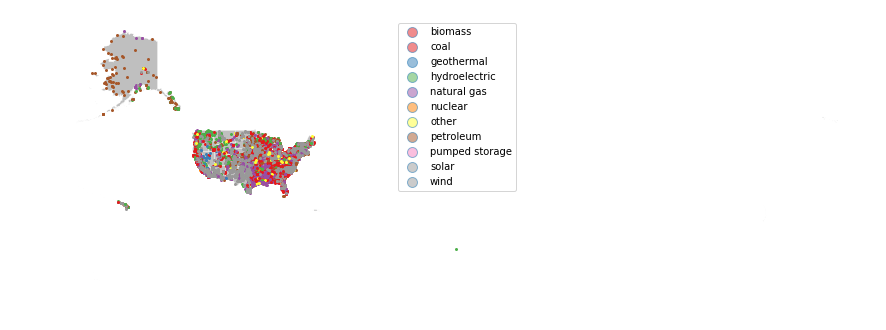

In [123]:
ax = us_states.plot(figsize=(15,15), color='grey', linewidth=0.25, edgecolor='white')
powerplants.plot(ax=ax, markeredgewidth=0, markersize=3, legend=True, column='PrimSource')
ax.axis('off')

### 2. Make a map of air quality stations, color coded by average air quality


In [11]:
air_quality = pd.read_csv('pm25_annual_fixed.csv')
air_quality.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18


In [12]:
air_quality.dtypes

State Code                         int64
County Code                        int64
Site Num                           int64
Parameter Code                     int64
POC                                int64
Latitude                         float64
Longitude                        float64
Datum                             object
Parameter Name                    object
Sample Duration                   object
Pollutant Standard                object
Metric Used                       object
Method Name                       object
Year                               int64
Units of Measure                  object
Event Type                        object
Observation Count                  int64
Observation Percent                int64
Completeness Indicator            object
Valid Day Count                    int64
Required Day Count                 int64
Exceptional Data Count             int64
Null Data Count                    int64
Primary Exceedance Count         float64
Secondary Exceed

In [13]:
points = air_quality.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)
air_quality = gpd.GeoDataFrame(air_quality, geometry=points)
air_quality.crs = {'init': 'epsg:4326'}

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

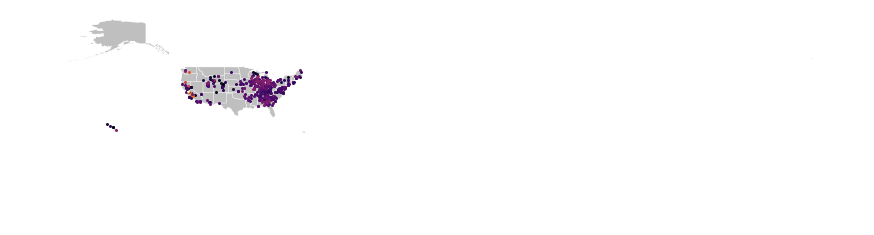

In [14]:
ax = us_states.plot(figsize=(15,15), color='grey',legend=True, linewidth=0.25, edgecolor='white')
air_quality.plot(column= 'Arithmetic Mean', cmap='inferno', ax=ax, markeredgewidth=0, markersize=3)
ax.axis('off')

### 3. Make a map of air quality stations, color coded by worst air quality ever 


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

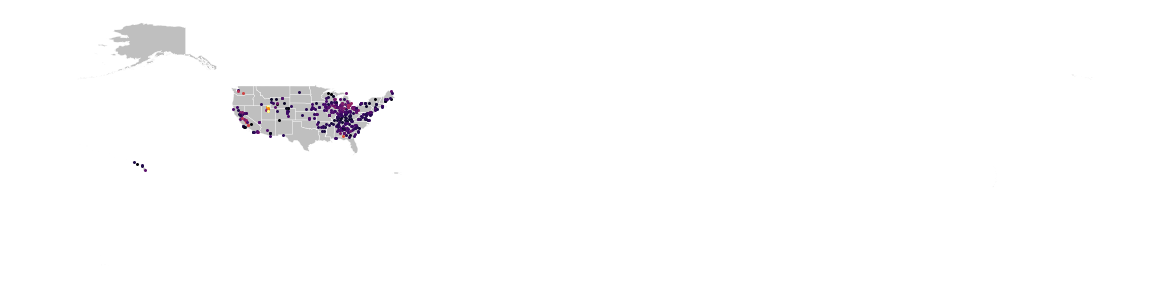

In [15]:
ax = us_states.plot(figsize=(20,20), color='grey', linewidth=0.25, edgecolor='white')
air_quality.plot(column= '1st Max Value', cmap='inferno', ax=ax, markeredgewidth=0, markersize=3)
ax.axis('off')

### 4. Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.


In [16]:
#powerplants.dissolve(by='Utility_Na', aggfunc='sum')

In [17]:
powerplants['Utility_Na'].value_counts().head()

Pacific Gas & Electric Co        82
Erie Boulevard Hydropower LP     71
Sustainable Power Group, LLC     63
Southern California Edison Co    62
PacifiCorp                       59
Name: Utility_Na, dtype: int64

In [18]:
a = powerplants[powerplants.Utility_Na.isin(['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp'])]

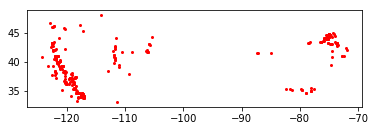

In [19]:
a.plot(color='red')

In [20]:
b = powerplants[~powerplants.Utility_Na.isin(['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp'])]

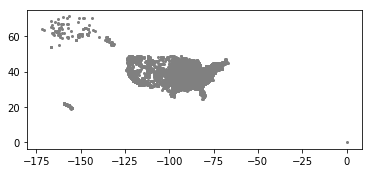

In [21]:
b.plot(color='grey')

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

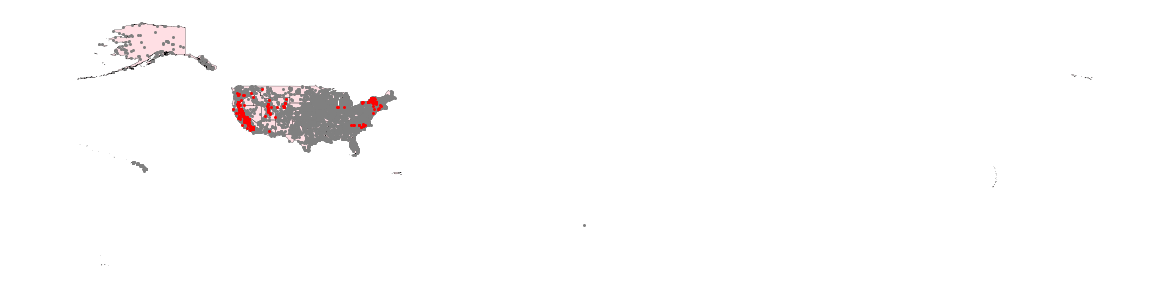

In [22]:
ax = us_states.plot(figsize=(20,20), color='pink', linewidth=0.25, edgecolor='black')
b.plot(color='grey', ax=ax, markeredgewidth=0, markersize=3)
a.plot(color='red', ax=ax, markeredgewidth=0, markersize=3)
ax.axis('off')

### 5. Map all of the nuclear power plants in red, with the rest of the plants as dark grey.


In [23]:
c = powerplants[~(powerplants.PrimSource == 'nuclear')]

In [24]:
d = powerplants[(powerplants.PrimSource == 'nuclear')]

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

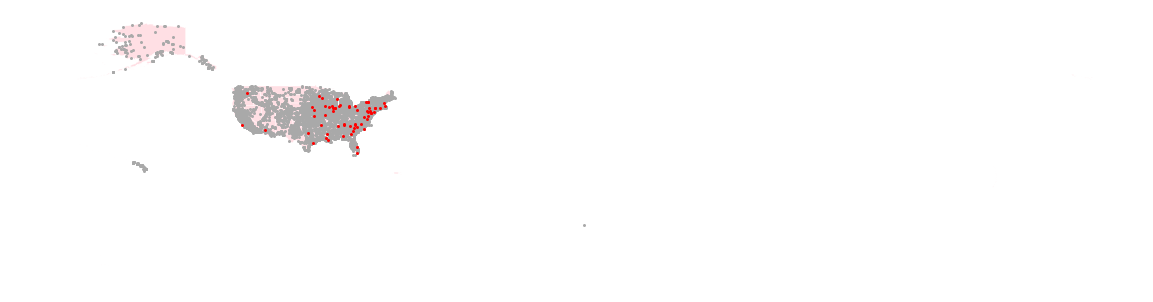

In [25]:
ax = us_states.plot(figsize=(20,20), color='pink', linewidth=0.25, edgecolor='white')
c.plot(color='darkgrey', ax=ax, markeredgewidth=0, markersize=3)
d.plot(color='red', ax=ax, markeredgewidth=0, markersize=3)
ax.axis('off')

### 6. Map power plants that produce energy through both natural gas and oil.

In [26]:
powerplants['PrimSource'].value_counts()

natural gas       1676
hydroelectric     1398
solar             1379
wind               932
petroleum          832
biomass            739
coal               380
other              112
geothermal          66
nuclear             62
pumped storage      34
Name: PrimSource, dtype: int64

In [27]:
doubles = powerplants[['NG_MW', 'Crude_MW','geometry']]

In [28]:
doubles = doubles[(doubles.NG_MW >0) & (doubles.Crude_MW >0)]

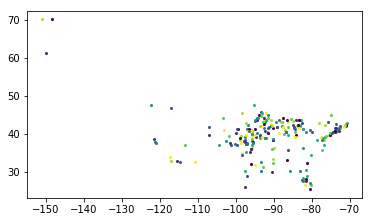

In [29]:
doubles.plot()

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

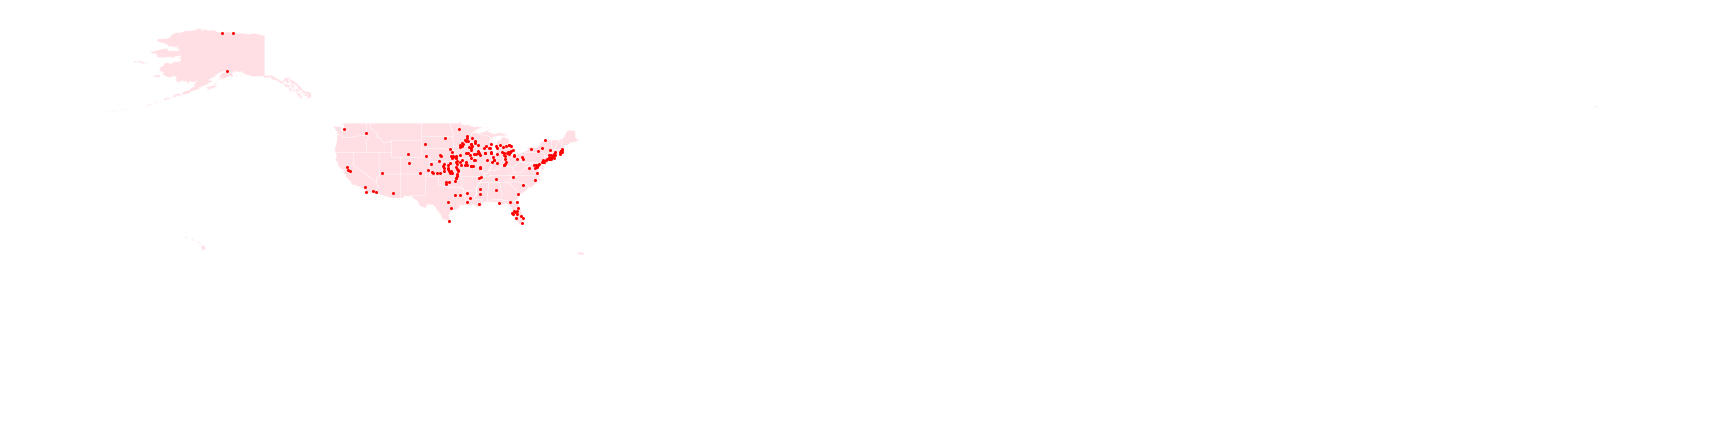

In [30]:
ax = us_states.plot(figsize=(30,30), color='pink', linewidth=0.25, edgecolor='white')
doubles.plot(figsize=(30,30), color='red', ax=ax, markeredgewidth=0, markersize=3)
ax.axis('off')